In [17]:
import pandas as pd

df = pd.read_csv("../data/medium/Order/modified/test/test.csv")
df

,GridID,month,day,hour,minute,target
0,0,6,24,0,0,3
1,0,6,24,0,10,5
2,0,6,24,0,20,6
3,0,6,24,0,30,10
4,0,6,24,0,40,13
...,...,...,...,...,...,...
53419,52,6,30,23,10,28
53420,52,6,30,23,20,19
53421,52,6,30,23,30,19
53422,52,6,30,23,40,17


In [18]:
max(df["target"])

90

In [19]:
idle_vehicles = pd.read_csv("../outputs/tmp/check.csv")

In [20]:
df.shape

(53424, 6)

In [21]:
df2 = pd.merge(left=df, right=idle_vehicles, on=["GridID", "day", "hour", "minute"])
df2.head()

,GridID,month,day,hour,minute,target,num_idle_vehicle
0,0,6,24,0,10,5,21
1,0,6,24,0,20,6,30
2,0,6,24,0,30,10,18
3,0,6,24,0,40,13,17
4,0,6,24,0,50,7,14


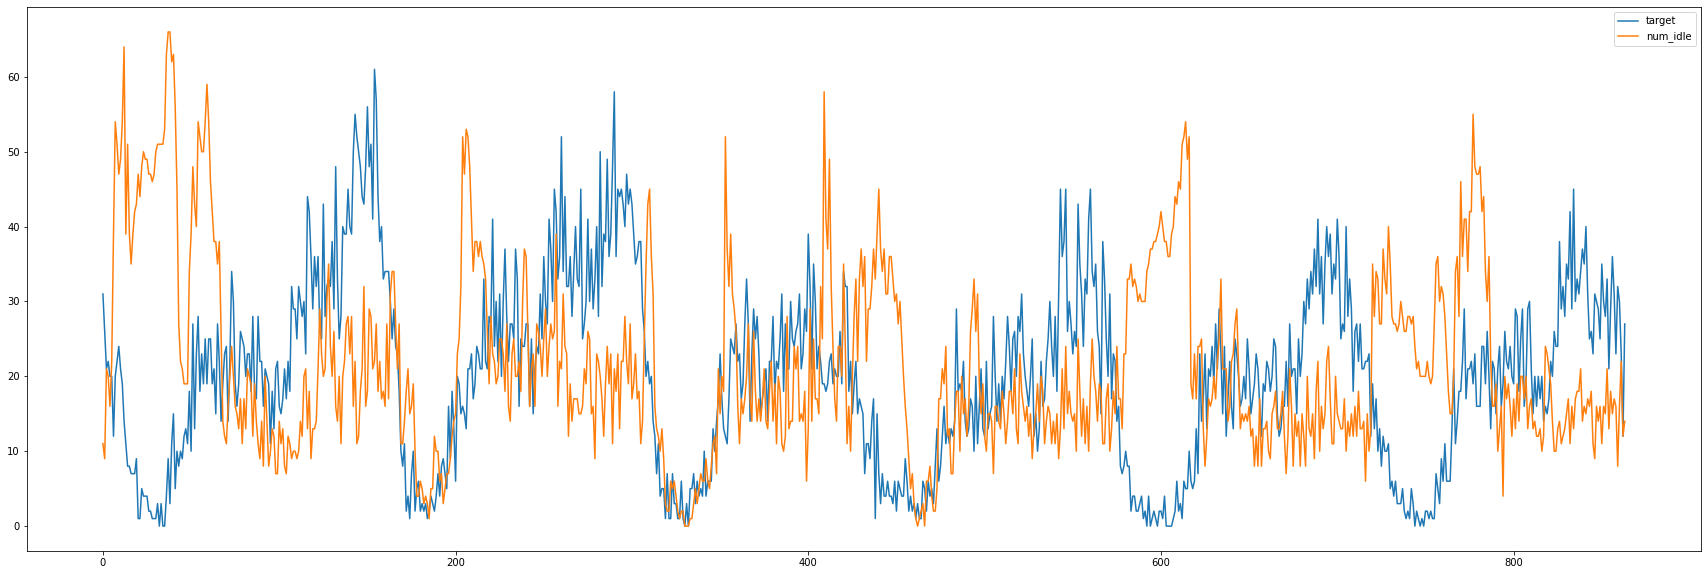

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
for i in [30]:
    tmp = df2[df2["GridID"]==i]
    plt.plot(range(len(tmp)),tmp["target"], label="target")
    plt.plot(range(len(tmp)),tmp["num_idle_vehicle"], label="num_idle")
plt.legend()
plt.show()

In [28]:
tmp = pd.read_csv("../outputs/2022-6-30_21:51/dispatch_history.csv")
(len(tmp[tmp["from_area_id"]==tmp["to_area_id"]]) / len(tmp)) * 100

77.99298831198651

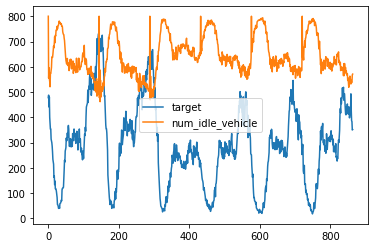

In [8]:
tmp2 = df2[["day", "hour", "minute", "target", "num_idle_vehicle"]].groupby(["day", "hour", "minute"]).sum()
plt.plot(list(range(len(tmp2))), tmp2["target"], label="target")
plt.plot(list(range(len(tmp2))), tmp2["num_idle_vehicle"], label="num_idle_vehicle")
plt.legend()
plt.show()

In [9]:
df2

,GridID,month,day,hour,minute,target,num_idle_vehicle
0,0,6,24,0,10,5,21
1,0,6,24,0,20,6,30
2,0,6,24,0,30,10,18
3,0,6,24,0,40,13,17
4,0,6,24,0,50,7,14
...,...,...,...,...,...,...,...
45787,52,6,29,23,20,12,30
45788,52,6,29,23,30,20,33
45789,52,6,29,23,40,12,24
45790,52,6,29,23,50,4,15


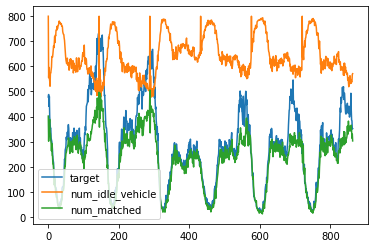

In [29]:
df_tmp = pd.read_csv("../outputs/tmp/match_check.csv")
df3 = pd.merge(left=df2, right=df_tmp, on=["GridID", "day", "hour", "minute"])

tmp3 = df3[["day", "hour", "minute", "target", "num_idle_vehicle", "num_matched"]].groupby(["day", "hour", "minute"]).sum()
plt.plot(list(range(len(tmp3))), tmp3["target"], label="target")
plt.plot(list(range(len(tmp3))), tmp3["num_idle_vehicle"], label="num_idle_vehicle")
plt.plot(list(range(len(tmp3))), tmp3["num_matched"], label="num_matched")
plt.legend()
plt.show()

0.19360929498534574


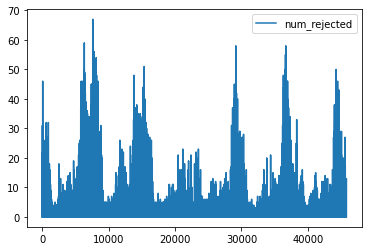

In [30]:
print(sum(df_tmp["num_rejected"]) / sum(df_tmp["num_order"]))
plt.plot(list(range(len(df_tmp))), df_tmp["num_rejected"], label="num_rejected")
plt.legend()

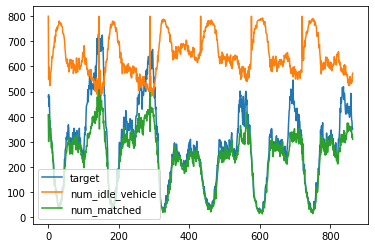

In [10]:
df_tmp = pd.read_csv("../outputs/tmp/match_check.csv")
df3 = pd.merge(left=df2, right=df_tmp, on=["GridID", "day", "hour", "minute"])

tmp3 = df3[["day", "hour", "minute", "target", "num_idle_vehicle", "num_matched"]].groupby(["day", "hour", "minute"]).sum()
plt.plot(list(range(len(tmp3))), tmp3["target"], label="target")
plt.plot(list(range(len(tmp3))), tmp3["num_idle_vehicle"], label="num_idle_vehicle")
plt.plot(list(range(len(tmp3))), tmp3["num_matched"], label="num_matched")
plt.legend()
plt.show()

0.1839632516345132


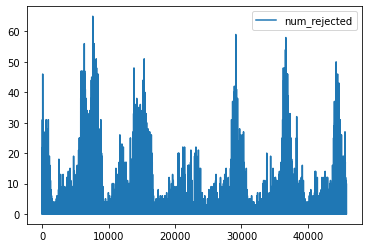

In [16]:
print(sum(df_tmp["num_rejected"]) / sum(df_tmp["num_order"]))
plt.plot(list(range(len(df_tmp))), df_tmp["num_rejected"], label="num_rejected")
plt.legend()

In [12]:
tmp3[tmp3["num_rejected"] < 0]

target  num_idle_vehicle  num_matched  num_rejected
day hour minute                                                     
24  2    50         163               674          170            -7
    3    10         134               716          152           -18
         30         117               725          122            -5
    4    30          55               749           68           -13
    5    0           40               764           41            -1
...                 ...               ...          ...           ...
29  12   0          273               603          282            -9
    14   0          314               589          326           -12
    15   0          264               608          287           -23
    16   10         243               608          258           -15
         40         227               650          231            -4

[110 rows x 4 columns]

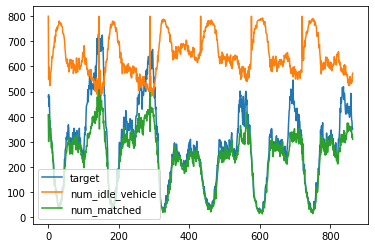

In [13]:
df_tmp = pd.read_csv("../outputs/tmp/match_check.csv")
df3 = pd.merge(left=df2, right=df_tmp, on=["GridID", "day", "hour", "minute"])

tmp3 = df3[["day", "hour", "minute", "target", "num_idle_vehicle", "num_matched"]].groupby(["day", "hour", "minute"]).sum()
plt.plot(list(range(len(tmp3))), tmp3["target"], label="target")
plt.plot(list(range(len(tmp3))), tmp3["num_idle_vehicle"], label="num_idle_vehicle")
plt.plot(list(range(len(tmp3))), tmp3["num_matched"], label="num_matched")
plt.legend()
plt.show()

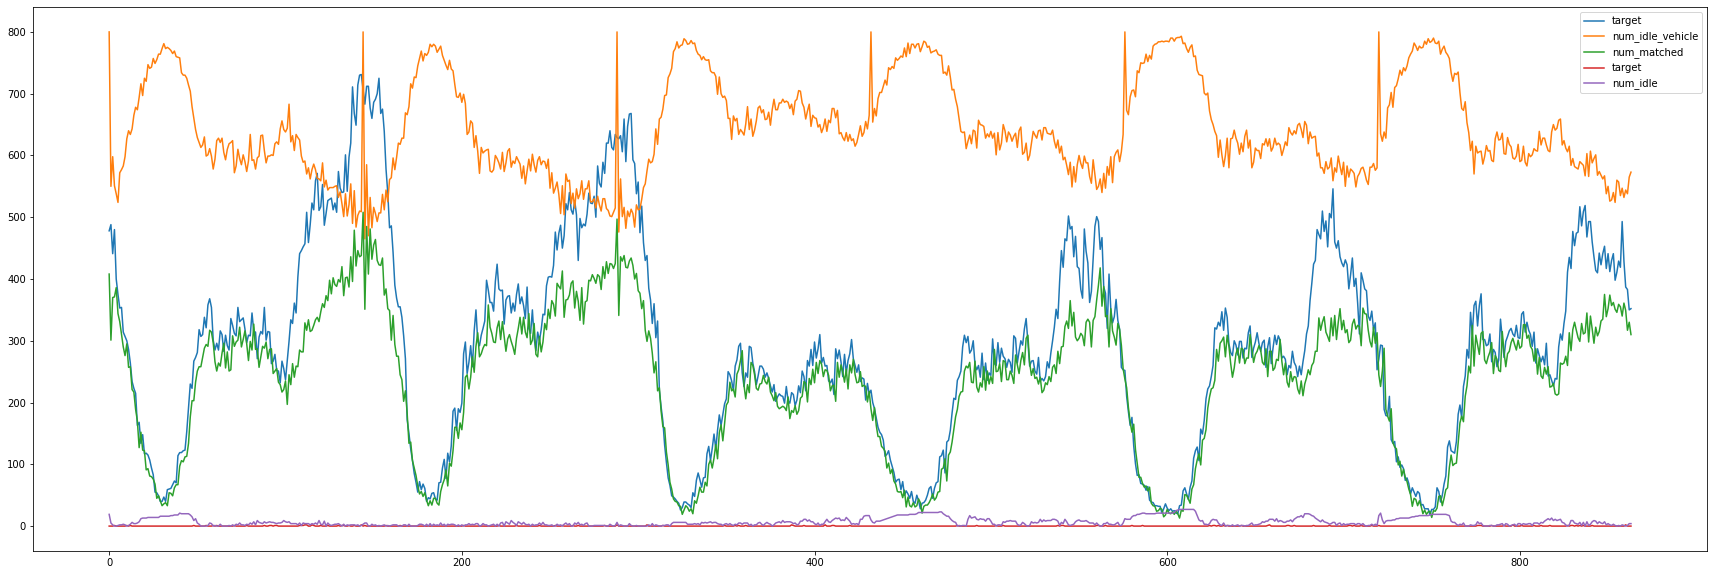

In [380]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
tmp3 = df3[["day", "hour", "minute", "target", "num_idle_vehicle", "num_matched"]].groupby(["day", "hour", "minute"]).sum()
plt.plot(list(range(len(tmp3))), tmp3["target"], label="target")
plt.plot(list(range(len(tmp3))), tmp3["num_idle_vehicle"], label="num_idle_vehicle")
plt.plot(list(range(len(tmp3))), tmp3["num_matched"], label="num_matched")
for i in [6]:
    tmp = df2[df2["GridID"]==i]
    plt.plot(range(len(tmp)),tmp["target"], label="target")
    plt.plot(range(len(tmp)),tmp["num_idle_vehicle"], label="num_idle")
plt.legend()
plt.show()

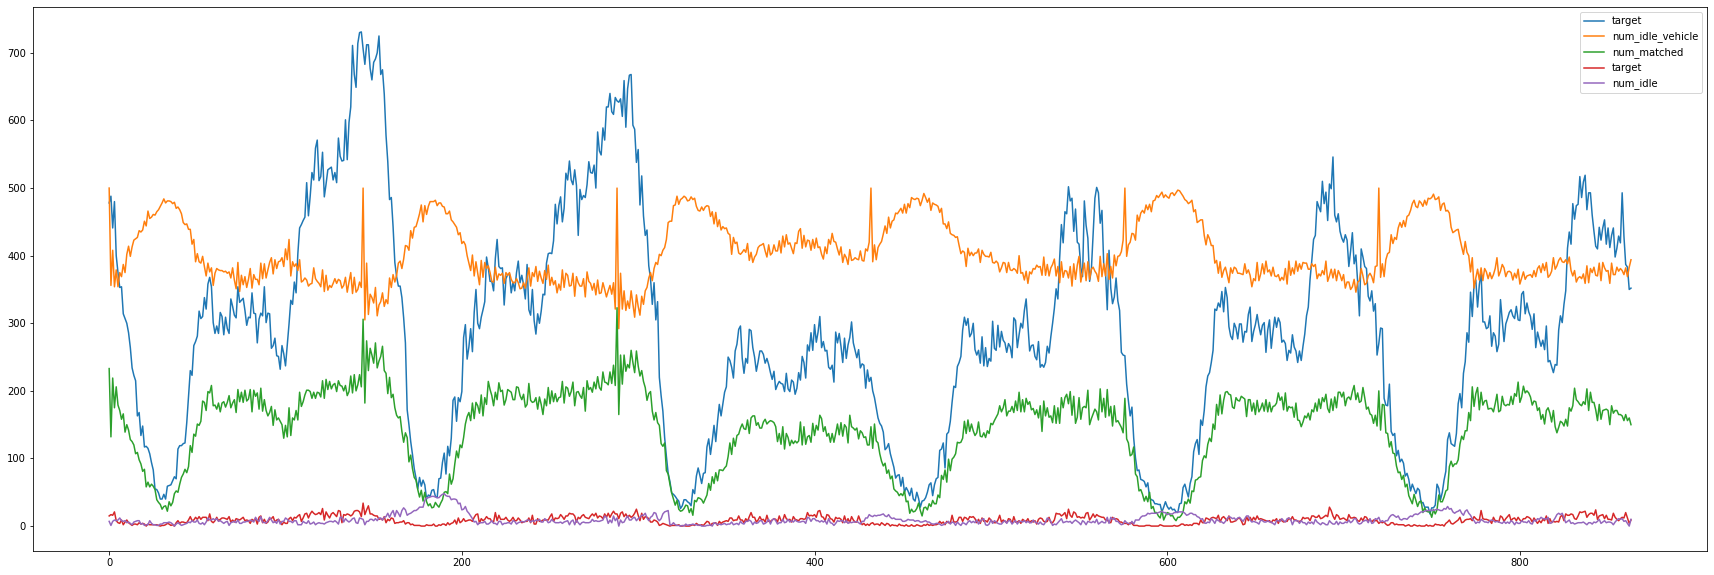

In [306]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
tmp3 = df3[["day", "hour", "minute", "target", "num_idle_vehicle", "num_matched"]].groupby(["day", "hour", "minute"]).sum()
plt.plot(list(range(len(tmp3))), tmp3["target"], label="target")
plt.plot(list(range(len(tmp3))), tmp3["num_idle_vehicle"], label="num_idle_vehicle")
plt.plot(list(range(len(tmp3))), tmp3["num_matched"], label="num_matched")
for i in [52]:
    tmp = df2[df2["GridID"]==i]
    plt.plot(range(len(tmp)),tmp["target"], label="target")
    plt.plot(range(len(tmp)),tmp["num_idle_vehicle"], label="num_idle")
plt.legend()
plt.show()

In [252]:
pd.set_option('display.max_rows', 11000)
tmp = pd.read_csv("../outputs/2022-6-30_3:33/dispatch_history.csv")
print((len(tmp[tmp["from_area_id"]!=tmp["to_area_id"]]) / len(tmp)) * 100)
print(len(tmp[(tmp["from_area_id"]==tmp["to_area_id"])]))
tmp[(tmp["from_area_id"]==tmp["to_area_id"])]

4.834164605024673
215799


,datetime,vehicle_id,from_area_id,to_area_id
0,2016-06-24 00:00:00,113,43,43
2,2016-06-24 00:00:00,130,11,11
3,2016-06-24 00:00:00,14,32,32
4,2016-06-24 00:00:00,369,32,32
5,2016-06-24 00:00:00,72,5,5
...,...,...,...,...
226755,2016-06-29 23:50:00,293,26,26
226756,2016-06-29 23:50:00,224,2,2
226757,2016-06-29 23:50:00,188,4,4
226759,2016-06-29 23:50:00,275,13,13
